In [1]:
import sys
sys.path.append('../')
from fcc_utils import *

In [2]:
from sklearn import datasets # for swiss roll dataset
import mpl_toolkits.mplot3d.axes3d as p3 # 3D plotting

In [61]:
import scanpy.external as sce

In [34]:
X, t = datasets.make_swiss_roll(n_samples=5000, noise=0.0, random_state=18)

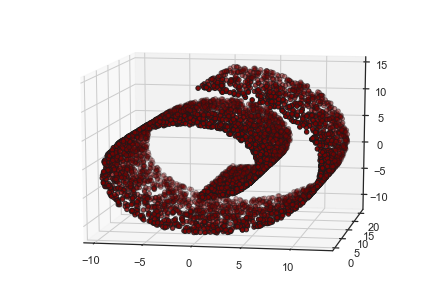

In [58]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(12, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=plt.cm.jet(t), s=20, edgecolor='k')

In [36]:
swiss = sc.AnnData(X=X) # initialize AnnData
swiss.obs['pos'] = t # add univariate position according to main dim of manifold to .obs

swiss

AnnData object with n_obs × n_vars = 5000 × 3 
    obs: 'pos'

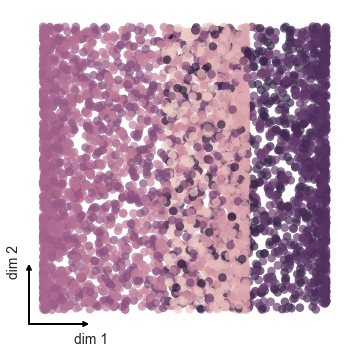

In [37]:
# 'top down' view
plot_DR(swiss.X, color=swiss.obs['pos'])

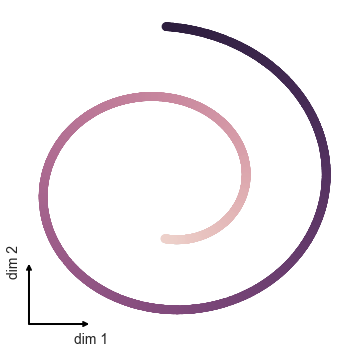

In [38]:
# 'front' view
plot_DR(swiss.X[:,[0,2]], color=swiss.obs['pos'])

In [39]:
# perform PCA
sc.tl.pca(swiss, n_comps=2)

In [40]:
# create neighborhood graphs from PCA results for UMAP and Louvain clustering
# heads-up: you will get a numba deprecation warning the first time you run this
sc.pp.neighbors(swiss, n_neighbors=30, use_rep='X', knn=True, random_state=18, metric='euclidean', copy=False)

In [41]:
# perform Louvain clustering
sc.tl.louvain(swiss, resolution=0.5, key_added='louvain', random_state=18, copy=False)
# put cluster names in string column of .obs for plotting
swiss.obs['clusterID'] = 'cluster_' + swiss.obs['louvain'].astype(str)

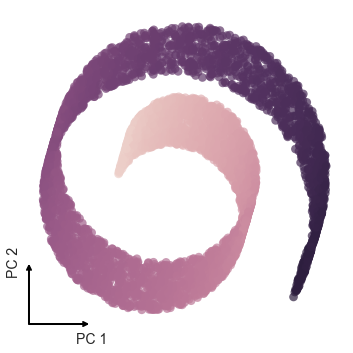

In [42]:
plot_DR(swiss.obsm['X_pca'], color=swiss.obs['pos'], dim_name='PC')

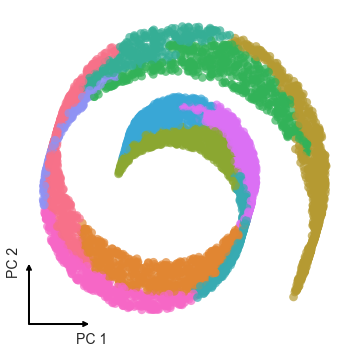

In [43]:
plot_DR(swiss.obsm['X_pca'], color=swiss.obs['clusterID'], dim_name='PC')

In [44]:
# perform UMAP
sc.tl.umap(swiss)

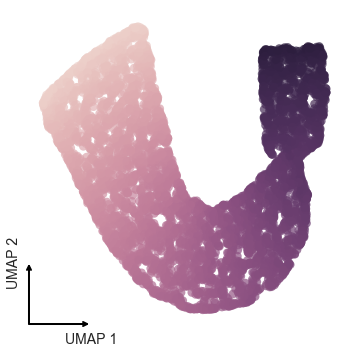

In [45]:
plot_DR(swiss.obsm['X_umap'], color=swiss.obs['pos'], dim_name='UMAP')

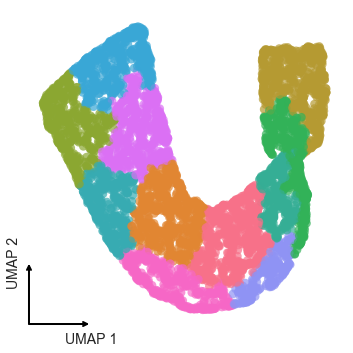

In [46]:
plot_DR(swiss.obsm['X_umap'], color=swiss.obs['clusterID'], dim_name='UMAP')

In [47]:
# perform t-SNE
sc.tl.tsne(swiss, use_rep='X')

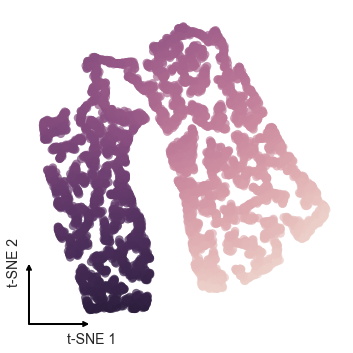

In [48]:
plot_DR(swiss.obsm['X_tsne'], color=swiss.obs['pos'], dim_name='t-SNE')

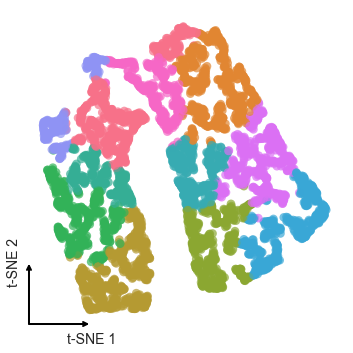

In [49]:
plot_DR(swiss.obsm['X_tsne'], color=swiss.obs['clusterID'], dim_name='t-SNE')

In [50]:
%%time
# save distance matrices in AnnData object for easy access
swiss.uns['tsne_distance'] = pdist(swiss.obsm['X_tsne'])
swiss.uns['umap_distance'] = pdist(swiss.obsm['X_umap'])
swiss.uns['pca_distance'] = pdist(swiss.obsm['X_pca'])
swiss.uns['native_distance'] = pdist(swiss.X)

CPU times: user 111 ms, sys: 640 µs, total: 112 ms
Wall time: 111 ms


In [51]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=swiss.uns['native_distance'], post=swiss.uns['pca_distance'])

CPU times: user 8.9 s, sys: 290 ms, total: 9.19 s
Wall time: 8.74 s


R: 0.8473
EMD: 0.0392
CPU times: user 5.74 s, sys: 122 ms, total: 5.86 s
Wall time: 5.64 s


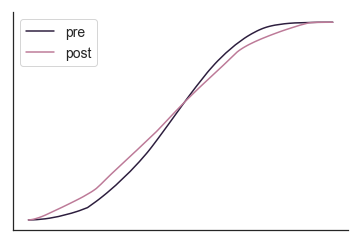

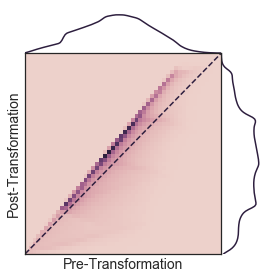

In [52]:
%%time
print('R: {}\nEMD: {}'.format(round(mantel_stats[0],4), round(EMD,4)))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [53]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=swiss.uns['native_distance'], post=swiss.uns['tsne_distance'])

CPU times: user 8.9 s, sys: 164 ms, total: 9.06 s
Wall time: 8.61 s


R: 0.4348
EMD: 0.0468
CPU times: user 5.8 s, sys: 136 ms, total: 5.94 s
Wall time: 5.72 s


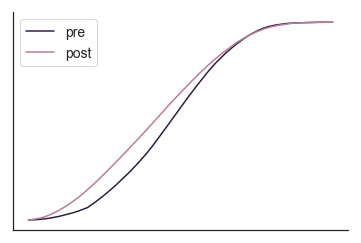

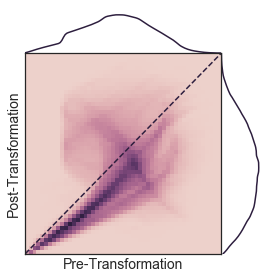

In [54]:
%%time
print('R: {}\nEMD: {}'.format(round(mantel_stats[0],4), round(EMD,4)))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [55]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=swiss.uns['native_distance'], post=swiss.uns['umap_distance'])

CPU times: user 8.81 s, sys: 162 ms, total: 8.97 s
Wall time: 8.52 s


R: 0.3497
EMD: 0.0522
CPU times: user 5.79 s, sys: 141 ms, total: 5.93 s
Wall time: 5.71 s


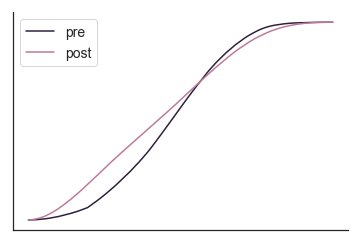

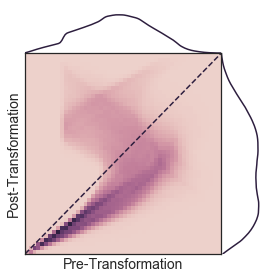

In [56]:
%%time
print('R: {}\nEMD: {}'.format(round(mantel_stats[0],4), round(EMD,4)))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

---
### Increase Sample Size

In [70]:
X, t = datasets.make_swiss_roll(n_samples=10000, noise=0.0, random_state=18)

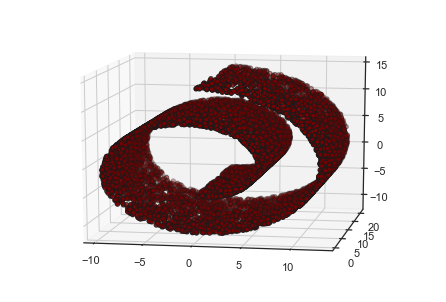

In [71]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(12, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=plt.cm.jet(t), s=20, edgecolor='k')

In [72]:
swiss_10k = sc.AnnData(X=X) # initialize AnnData
swiss_10k.obs['pos'] = t # add univariate position according to main dim of manifold to .obs

swiss_10k

AnnData object with n_obs × n_vars = 10000 × 3 
    obs: 'pos'

In [74]:
# perform PCA
sc.tl.pca(swiss_10k, n_comps=2)

In [95]:
# create neighborhood graphs from PCA results for UMAP and Louvain clustering
# heads-up: you will get a numba deprecation warning the first time you run this
sc.pp.neighbors(swiss_10k, n_neighbors=100, use_rep='X', knn=True, random_state=18, metric='euclidean', copy=False)

/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [96]:
# perform Louvain clustering
sc.tl.louvain(swiss_10k, resolution=0.5, key_added='louvain', random_state=18, copy=False)
# put cluster names in string column of .obs for plotting
swiss_10k.obs['clusterID'] = 'cluster_' + swiss.obs['louvain'].astype(str)

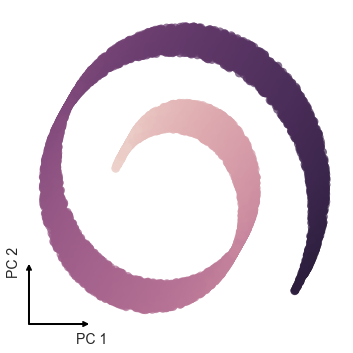

In [77]:
plot_DR(swiss_10k.obsm['X_pca'], color=swiss_10k.obs['pos'], dim_name='PC')

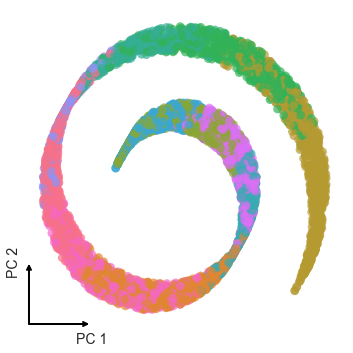

In [97]:
plot_DR(swiss_10k.obsm['X_pca'], color=swiss_10k.obs['clusterID'], dim_name='PC')

In [98]:
# perform UMAP
sc.tl.umap(swiss_10k)

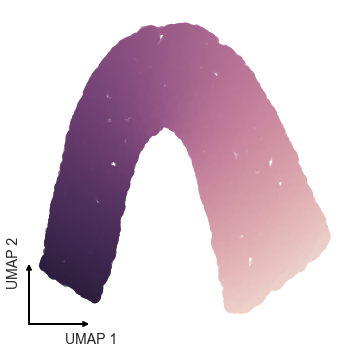

In [99]:
plot_DR(swiss_10k.obsm['X_umap'], color=swiss_10k.obs['pos'], dim_name='UMAP')

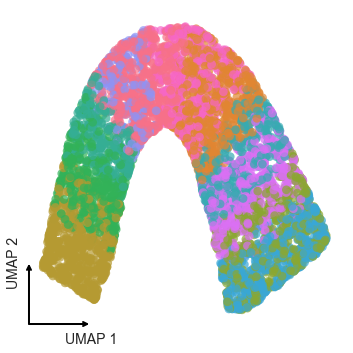

In [100]:
plot_DR(swiss_10k.obsm['X_umap'], color=swiss_10k.obs['clusterID'], dim_name='UMAP')

In [92]:
# perform t-SNE
sc.tl.tsne(swiss_10k, use_rep='X', perplexity=100)

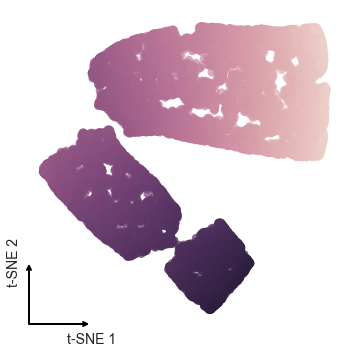

In [93]:
plot_DR(swiss_10k.obsm['X_tsne'], color=swiss_10k.obs['pos'], dim_name='t-SNE')

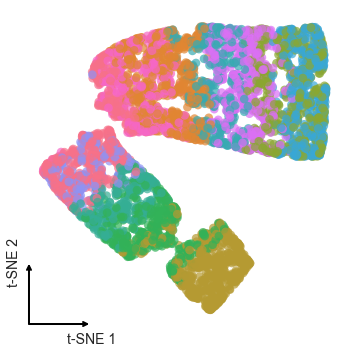

In [94]:
plot_DR(swiss_10k.obsm['X_tsne'], color=swiss_10k.obs['clusterID'], dim_name='t-SNE')

In [101]:
%%time
# save distance matrices in AnnData object for easy access
swiss_10k.uns['tsne_distance'] = pdist(swiss_10k.obsm['X_tsne'])
swiss_10k.uns['umap_distance'] = pdist(swiss_10k.obsm['X_umap'])
swiss_10k.uns['pca_distance'] = pdist(swiss_10k.obsm['X_pca'])
swiss_10k.uns['native_distance'] = pdist(swiss_10k.X)

CPU times: user 438 ms, sys: 57.7 ms, total: 495 ms
Wall time: 494 ms


In [86]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=swiss_10k.uns['native_distance'], post=swiss_10k.uns['pca_distance'])

CPU times: user 40.3 s, sys: 1.91 s, total: 42.2 s
Wall time: 41.7 s


R: 0.8512
EMD: 0.051
CPU times: user 24 s, sys: 1.47 s, total: 25.5 s
Wall time: 25.3 s


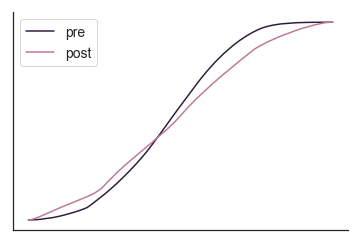

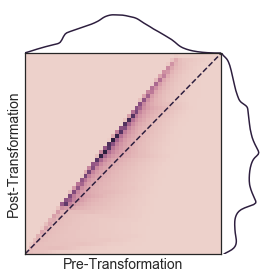

In [87]:
%%time
print('R: {}\nEMD: {}'.format(round(mantel_stats[0],4), round(EMD,4)))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [102]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=swiss_10k.uns['native_distance'], post=swiss_10k.uns['tsne_distance'])

CPU times: user 40.4 s, sys: 1.52 s, total: 41.9 s
Wall time: 41.4 s


R: 0.3777
EMD: 0.0452
CPU times: user 24.1 s, sys: 1.72 s, total: 25.8 s
Wall time: 25.6 s


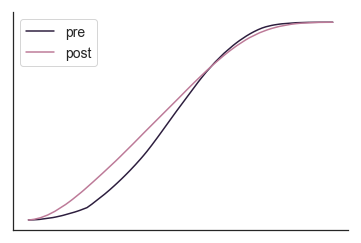

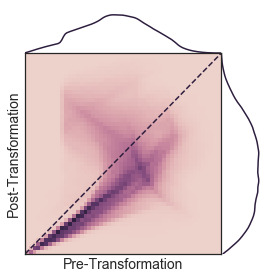

In [103]:
%%time
print('R: {}\nEMD: {}'.format(round(mantel_stats[0],4), round(EMD,4)))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [104]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=swiss_10k.uns['native_distance'], post=swiss_10k.uns['umap_distance'])

CPU times: user 40.3 s, sys: 1.54 s, total: 41.8 s
Wall time: 41.2 s


R: 0.3409
EMD: 0.0627
CPU times: user 23.9 s, sys: 1.2 s, total: 25.1 s
Wall time: 24.9 s


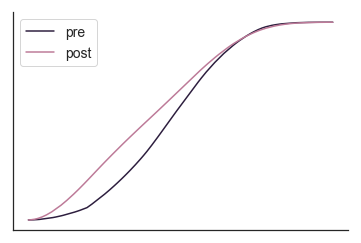

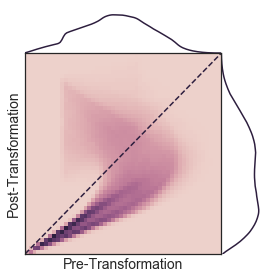

In [105]:
%%time
print('R: {}\nEMD: {}'.format(round(mantel_stats[0],4), round(EMD,4)))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)